In [ ]:
from io import open
import os, string, random, time, math
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

In [ ]:
from IPython.display import clear_output

## Dataset

# New Section

In [5]:
languages = []
data = []
X = []
y = []

with open('name2lang.txt', 'r') as f:
    for line in f:
        line = line.split(',')
        name = line[0].strip()
        lang = line[1].strip()
        if not lang in languages:
            languages.append(lang)
        X.append(name)
        y.append(lang)
        data.append((name, lang))

n_languages = len(languages)

FileNotFoundError: [Errno 2] No such file or directory: 'name2lang.txt'

In [14]:
import codecs

try:
    with codecs.open('name2lang.txt', 'r', encoding='utf-8', errors='ignore') as f:
        for i, line in enumerate(f):
            print(line.strip())
            if i > 10: # print first 10 lines
                break
except Exception as e:
    print(f"Error reading file: {e}")

Error reading file: [Errno 2] No such file or directory: 'name2lang.txt'


In [11]:
!ls

0516_BatchNorm_Dropout-1557985188257.ipynb  sample_data


In [22]:
!wget https://raw.githubusercontent.com/datasets/language-identification/main/data/name2lang.txt

--2025-10-22 05:21:55--  https://raw.githubusercontent.com/datasets/language-identification/main/data/name2lang.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2025-10-22 05:21:55 ERROR 404: Not Found.



In [26]:
languages = []
data = []
X = []
y = []

with open('name2lang.txt', 'r') as f:
    for line in f:
        if ',' in line:  # Skip lines without a comma
            line = line.split(',')
            name = line[0].strip()
            lang = line[1].strip()
            if not lang in languages:
                languages.append(lang)
            X.append(name)
            y.append(lang)
            data.append((name, lang))

n_languages = len(languages)

In [25]:
with open('name2lang.txt', 'r') as f:
    for i, line in enumerate(f):
        if ',' not in line:
            print(f"Line {i+1} has no comma: {line.strip()}")

Line 113 has no comma: Connel


In [23]:
file_content = """Abreu, Portuguese
Albuquerque, Portuguese
Almeida, Portuguese
Alves, Portuguese
Araujo, Portuguese
Araullo, Portuguese
Barros, Portuguese
Basurto, Portuguese
Belo, Portuguese
Cabral, Portuguese
Campos, Portuguese
Cardozo, Portuguese
Castro, Portuguese
Coelho, Portuguese
Costa, Portuguese
Crespo, Portuguese
Cruz, Portuguese
D'cruz, Portuguese
D'cruze, Portuguese
Delgado, Portuguese
De santigo, Portuguese
Duarte, Portuguese
Esteves, Portuguese
Fernandes, Portuguese
Ferreira, Portuguese
Ferreiro, Portuguese
Ferro, Portuguese
Fonseca, Portuguese
Franco, Portuguese
Freitas, Portuguese
Garcia, Portuguese
Gaspar, Portuguese
Gomes, Portuguese
Gouveia, Portuguese
Guerra, Portuguese
Henriques, Portuguese
Lobo, Portuguese
Machado, Portuguese
Madeira, Portuguese
Magalhaes, Portuguese
Maria, Portuguese
Mata, Portuguese
Mateus, Portuguese
Matos, Portuguese
Medeiros, Portuguese
Melo, Portuguese
Mendes, Portuguese
Moreno, Portuguese
Nunes, Portuguese
Palmeiro, Portuguese
Paredes, Portuguese
Pereira, Portuguese
Pinheiro, Portuguese
Pinho, Portuguese
Ramires, Portuguese
Ribeiro, Portuguese
Rios, Portuguese
Rocha, Portuguese
Rodrigues, Portuguese
Romao, Portuguese
Rosario, Portuguese
Salazar, Portuguese
Santana, Portuguese
Santiago, Portuguese
Santos, Portuguese
Serafim, Portuguese
Silva, Portuguese
Silveira, Portuguese
Simoes, Portuguese
Soares, Portuguese
Souza, Portuguese
Torres, Portuguese
Vargas, Portuguese
Ventura, Portuguese
Adam, Irish
Ahearn, Irish
Aodh, Irish
Aodha, Irish
Aonghuis, Irish
Aonghus, Irish
Bhrighde, Irish
Bradach, Irish
Bradan, Irish
Braden, Irish
Brady, Irish
Bran, Irish
Brannon, Irish
Brian, Irish
Callaghan, Irish
Caomh, Irish
Carey, Irish
Casey, Irish
Cassidy, Irish
Cathain, Irish
Cathan, Irish
Cathasach, Irish
Ceallach, Irish
Ceallachan, Irish
Cearbhall, Irish
Cennetig, Irish
Ciardha, Irish
Clark, Irish
Cleirich, Irish
Cleirigh, Irish
Cnaimhin, Irish
Coghlan, Irish
Coilean, Irish
Collins, Irish
Colman, Irish
Conall, Irish
Conchobhar, Irish
Conn, Irish
Connel"""

with open('name2lang.txt', 'w') as f:
    f.write(file_content)

In [27]:
print(languages)

['Portuguese', 'Irish']


In [28]:
print(data[0:10])

[('Abreu', 'Portuguese'), ('Albuquerque', 'Portuguese'), ('Almeida', 'Portuguese'), ('Alves', 'Portuguese'), ('Araujo', 'Portuguese'), ('Araullo', 'Portuguese'), ('Barros', 'Portuguese'), ('Basurto', 'Portuguese'), ('Belo', 'Portuguese'), ('Cabral', 'Portuguese')]


### Train-test split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [30]:
print(X_train)

['Cnaimhin', 'Fonseca', 'Palmeiro', 'Nunes', 'Coilean', 'Delgado', 'Brian', 'Pereira', 'Bradan', 'Brady', 'Cathan', 'Ciardha', 'Aodh', 'Ceallachan', 'Silva', 'Basurto', 'Mata', 'Almeida', 'Cleirigh', "D'cruze", 'Araujo', 'Albuquerque', 'Araullo', 'Simoes', 'Cruz', 'Madeira', 'Brannon', 'Torres', 'Bradach', 'Bhrighde', 'Salazar', 'Duarte', 'Costa', 'Bran', 'Gouveia', 'Cardozo', 'Coelho', 'Esteves', 'Clark', 'Freitas', 'Campos', 'Rosario', 'Cennetig', 'Matos', 'Garcia', 'Castro', 'Silveira', 'Romao', 'Caomh', 'Paredes', 'Ahearn', 'Soares', 'Conn', 'Moreno', 'Vargas', 'Ramires', 'Magalhaes', 'Aonghus', 'Ferro', 'Maria', 'Belo', 'Ferreira', 'Colman', 'Ferreiro', 'Mateus', 'Collins', "D'cruz", 'Pinheiro', 'Santiago', 'De santigo', 'Crespo', 'Melo', 'Conall', 'Cearbhall', 'Santos', 'Casey', 'Rodrigues', 'Medeiros', 'Rios', 'Barros', 'Carey', 'Machado', 'Cleirich', 'Alves', 'Mendes', 'Coghlan', 'Ceallach', 'Souza', 'Callaghan']


In [31]:
print(len(X_train), len(X_test))

89 23


### Encoding names and language

In [32]:
all_letters = string.ascii_letters + " .,;'"
n_letters = len(all_letters)

In [33]:
def name_rep(name):
    rep = torch.zeros(len(name), 1, n_letters)
    for index, letter in enumerate(name):
        pos = all_letters.find(letter)
        rep[index][0][pos] = 1
    return rep

In [34]:
def lang_rep(lang):
    return torch.tensor([languages.index(lang)], dtype=torch.long)

In [35]:
name_rep('Abreu')

tensor([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0

In [36]:
lang_rep('Portuguese')

tensor([0])

### Basic visualisation

In [37]:
count = {}
for l in languages:
    count[l] = 0
for d in data:
    count[d[1]] += 1

In [38]:
print(count)

{'Portuguese': 74, 'Irish': 38}


/tmp/ipython-input-1085331493.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt_.set_xticklabels(plt_.get_xticklabels(), rotation=90)


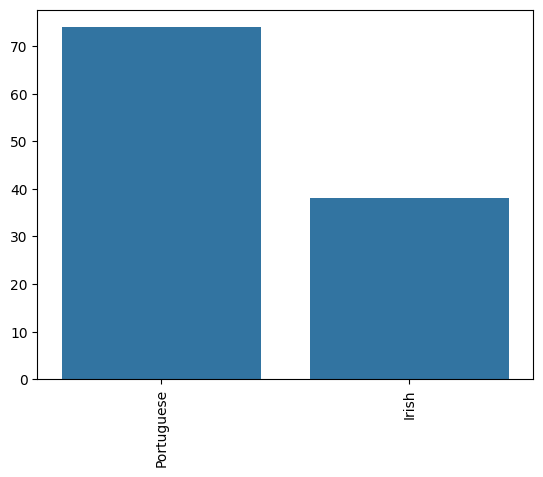

In [41]:
plt_ = sns.barplot(x=list(count.keys()), y=list(count.values()))
plt_.set_xticklabels(plt_.get_xticklabels(), rotation=90)
plt.show()

## Basic network and testing inference

In [42]:
class RNN_net(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNN_net, self).__init__()
        self.hidden_size = hidden_size
        self.i2h = nn.Linear(input_size + hidden_size, hidden_size)
        self.i2o = nn.Linear(input_size + hidden_size, output_size)
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, input_, hidden):
        combined = torch.cat((input_, hidden), 1)
        hidden = self.i2h(combined)
        output = self.i2o(combined)
        output = self.softmax(output)
        return output, hidden

    def init_hidden(self):
        return torch.zeros(1, self.hidden_size)

In [43]:
n_hidden = 128
net = RNN_net(n_letters, n_hidden, n_languages)

In [44]:
def infer(net, name):
    net.eval()
    name_ohe = name_rep(name)
    hidden = net.init_hidden()

    for i in range(name_ohe.size()[0]):
        output, hidden = net(name_ohe[i], hidden)

    return output

In [45]:
output = infer(net, 'Adam')
index = torch.argmax(output)
print(output, index)

tensor([[-0.6791, -0.7074]], grad_fn=<LogSoftmaxBackward0>) tensor(0)


## Evaluate model

In [46]:
def dataloader(npoints, X_, y_):
    to_ret = []
    for i in range(npoints):
        index_ = np.random.randint(len(X_))
        name, lang = X_[index_], y_[index_]
        to_ret.append((name, lang, name_rep(name), lang_rep(lang)))
    return to_ret

In [47]:
dataloader(2, X_train, y_train)

[('Campos',
  'Portuguese',
  tensor([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
            0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
            0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
            0., 0., 0., 0., 0., 0.]],
  
          [[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
            0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
            0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
            0., 0., 0., 0., 0., 0.]],
  
          [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
            0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
            0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
            0., 0., 0., 0., 0., 0.]],
  
          [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
            0., 0., 0., 0., 0., 0., 0., 0., 0., 0

In [48]:
def eval(net, n_points, k, X_, y_):

    data_ = dataloader(n_points, X_, y_)
    correct = 0

    for name, language, name_ohe, lang_rep in data_:

        output = infer(net, name)
        val, indices = output.topk(k)

        if lang_rep in indices:
            correct += 1

    accuracy = correct/n_points
    return accuracy

In [50]:
eval(net, 1000, 2, X_test, y_test)

1.0

## Training

### Basic setup

In [51]:
def train(net, opt, criterion, n_points):

    opt.zero_grad()
    total_loss = 0

    data_ = dataloader(n_points, X_train, y_train)

    for name, language, name_ohe, lang_rep in data_:

        hidden = net.init_hidden()

        for i in range(name_ohe.size()[0]):
            output, hidden = net(name_ohe[i], hidden)

        loss = criterion(output, lang_rep)
        loss.backward(retain_graph=True)

        total_loss += loss

    opt.step()

    return total_loss/n_points

In [52]:
criterion = nn.NLLLoss()
opt = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)

In [53]:
%%time
train(net, opt, criterion, 200)

CPU times: user 244 ms, sys: 49.4 ms, total: 294 ms
Wall time: 331 ms


tensor(0.6994, grad_fn=<DivBackward0>)

In [54]:
eval(net, 1000, 1, X_test, y_test)

0.674

### Full training setup

In [55]:
def train_setup(net, lr = 0.01, n_batches = 100, batch_size = 10, momentum = 0.9, display_freq=5):

    criterion = nn.NLLLoss()
    opt = optim.SGD(net.parameters(), lr=lr, momentum=momentum)

    loss_arr = np.zeros(n_batches + 1)

    for i in range(n_batches):
        loss_arr[i+1] = (loss_arr[i]*i + train(net, opt, criterion, batch_size))/(i + 1)

        if i%display_freq == display_freq-1:
            clear_output(wait=True)

            print('Iteration', i, 'Top-1:', eval(net, len(X_test), 1, X_test, y_test), 'Top-2:', eval(net, len(X_test), 2, X_test, y_test), 'Loss', loss_arr[i])
            plt.figure()
            plt.plot(loss_arr[1:i], '-*')
            plt.xlabel('Iteration')
            plt.ylabel('Loss')
            plt.show()
            print('\n\n')


Iteration 99 Top-1: 0.6956521739130435 Top-2: 1.0 Loss 0.13117870688438416


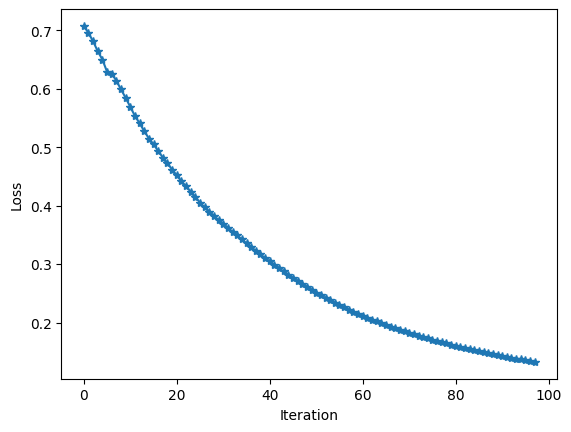

In [56]:
n_hidden = 128
net = RNN_net(n_letters, n_hidden, n_languages)
train_setup(net, lr=0.0005, n_batches=100, batch_size = 256)

## LSTM cell

In [57]:
class LSTM_net(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(LSTM_net, self).__init__()
        self.hidden_size = hidden_size
        self.lstm_cell = nn.LSTM(input_size, hidden_size)
        self.h2o = nn.Linear(hidden_size, output_size)
        self.softmax = nn.LogSoftmax(dim=2)

    def forward(self, input_, hidden):
        out, hidden = self.lstm_cell(input_.view(1, 1, -1), hidden)
        output = self.h2o(hidden[0])
        output = self.softmax(output)
        return output.view(1, -1), hidden

    def init_hidden(self):
        return (torch.zeros(1, 1, self.hidden_size), torch.zeros(1, 1, self.hidden_size))

Iteration 99 Top-1: 0.8260869565217391 Top-2: 1.0 Loss 0.3167172968387604


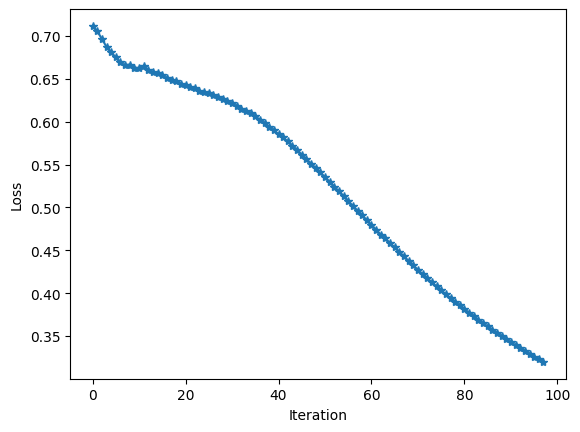

In [58]:
n_hidden = 128
net = LSTM_net(n_letters, n_hidden, n_languages)
train_setup(net, lr=0.0005, n_batches=100, batch_size = 256)

## GRU Cell

In [59]:
class GRU_net(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(GRU_net, self).__init__()
        self.hidden_size = hidden_size
        self.gru_cell = nn.GRU(input_size, hidden_size)
        self.h2o = nn.Linear(hidden_size, output_size)
        self.softmax = nn.LogSoftmax(dim=2)

    def forward(self, input_, hidden):
        out, hidden = self.gru_cell(input_.view(1, 1, -1), hidden)
        output = self.h2o(hidden)
        output = self.softmax(output)
        return output.view(1, -1), hidden

    def init_hidden(self):
        return torch.zeros(1, 1, self.hidden_size)

Iteration 99 Top-1: 0.8695652173913043 Top-2: 1.0 Loss 0.3091103136539459


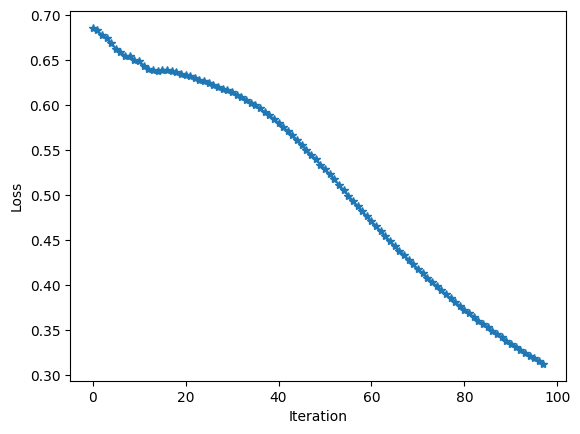

In [60]:
n_hidden = 128
net = LSTM_net(n_letters, n_hidden, n_languages)
train_setup(net, lr=0.0005, n_batches=100, batch_size = 256)